# Scraping Quotes 
## Test the scraping script part by part

In [120]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [121]:
# URL of the website to scrape
url_base = "http://quotes.toscrape.com/"

In [122]:
# List to store scraped data
list_quote = []

In [123]:
# Test response
response = requests.get(url_base)
response.status_code

200

In [124]:
soup = BeautifulSoup(response.text, 'html.parser')
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Quotes to Scrape</title>
<link href="/static/bootstrap.min.css" rel="stylesheet"/>
<link href="/static/main.css" rel="stylesheet"/>
</head>
<body>
<div class="container">
<div class="row header-box">
<div class="col-md-8">
<h1>
<a href="/" style="text-decoration: none">Quotes to Scrape</a>
</h1>
</div>
<div class="col-md-4">
<p>
<a href="/login">Login</a>
</p>
</div>
</div>
<div class="row">
<div class="col-md-8">
<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="

In [125]:
quotes = soup.find_all('div', class_='quote')
quotes

[<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
 <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
 <span>by <small class="author" itemprop="author">Albert Einstein</small>
 <a href="/author/Albert-Einstein">(about)</a>
 </span>
 <div class="tags">
             Tags:
             <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
 <a class="tag" href="/tag/change/page/1/">change</a>
 <a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
 <a class="tag" href="/tag/thinking/page/1/">thinking</a>
 <a class="tag" href="/tag/world/page/1/">world</a>
 </div>
 </div>,
 <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
 <span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>
 <span>by <small class="author" itempr

In [126]:
test_list = []
for quote in quotes:
    text = quote.find('span', class_='text').get_text()
    author = quote.find('small', class_='author').get_text()
    # for tag in quote.find_all('a', class_='tag'):
    #     print(tag.get_text())
    tags = [tag.get_text() for tag in quote.find_all('a', class_='tag')]
    # print(text)
    # print(author)
    # print(tags)

    test_list.append({
        'quote': text,
        'author': author,
        'tags': ', '.join(tags)
    })
# test_list
pd.DataFrame(test_list)

,quote,author,tags
0,“The world as we have created it is a process ...,Albert Einstein,"change, deep-thoughts, thinking, world"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"abilities, choices"
2,“There are only two ways to live your life. On...,Albert Einstein,"inspirational, life, live, miracle, miracles"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"aliteracy, books, classic, humor"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"be-yourself, inspirational"
5,“Try not to become a man of success. Rather be...,Albert Einstein,"adulthood, success, value"
6,“It is better to be hated for what you are tha...,André Gide,"life, love"
7,"“I have not failed. I've just found 10,000 way...",Thomas A. Edison,"edison, failure, inspirational, paraphrased"
8,“A woman is like a tea bag; you never know how...,Eleanor Roosevelt,misattributed-eleanor-roosevelt
9,"“A day without sunshine is like, you know, nig...",Steve Martin,"humor, obvious, simile"


In [127]:
df_test = pd.DataFrame(test_list)
df_test.head()

,quote,author,tags
0,“The world as we have created it is a process ...,Albert Einstein,"change, deep-thoughts, thinking, world"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"abilities, choices"
2,“There are only two ways to live your life. On...,Albert Einstein,"inspirational, life, live, miracle, miracles"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"aliteracy, books, classic, humor"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"be-yourself, inspirational"


In [128]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   quote   10 non-null     object
 1   author  10 non-null     object
 2   tags    10 non-null     object
dtypes: object(3)
memory usage: 368.0+ bytes


In [129]:
import re

In [130]:
quote_cleaned = [re.sub(r'[“”.,]', '', quote) for quote in df_test['quote']]


In [131]:
quote_cleaned

['The world as we have created it is a process of our thinking It cannot be changed without changing our thinking',
 'It is our choices Harry that show what we truly are far more than our abilities',
 'There are only two ways to live your life One is as though nothing is a miracle The other is as though everything is a miracle',
 'The person be it gentleman or lady who has not pleasure in a good novel must be intolerably stupid',
 "Imperfection is beauty madness is genius and it's better to be absolutely ridiculous than absolutely boring",
 'Try not to become a man of success Rather become a man of value',
 'It is better to be hated for what you are than to be loved for what you are not',
 "I have not failed I've just found 10000 ways that won't work",
 "A woman is like a tea bag; you never know how strong it is until it's in hot water",
 'A day without sunshine is like you know night']

In [132]:
df_test['quote_cleaned'] = quote_cleaned

In [133]:
df_test.head()

,quote,author,tags,quote_cleaned
0,“The world as we have created it is a process ...,Albert Einstein,"change, deep-thoughts, thinking, world",The world as we have created it is a process o...
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"abilities, choices",It is our choices Harry that show what we trul...
2,“There are only two ways to live your life. On...,Albert Einstein,"inspirational, life, live, miracle, miracles",There are only two ways to live your life One ...
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"aliteracy, books, classic, humor",The person be it gentleman or lady who has not...
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"be-yourself, inspirational",Imperfection is beauty madness is genius and i...


In [134]:
test_next_page = soup.find('li', class_='next')
test_next_page

<li class="next">
<a href="/page/2/">Next <span aria-hidden="true">→</span></a>
</li>

In [135]:
test_next_page.find('a')['href']

'/page/2/'

In [136]:
url_base + test_next_page.find('a')['href']

'http://quotes.toscrape.com//page/2/'

In [137]:
requests.get(url_base + test_next_page.find('a')['href']).status_code

200

In [138]:
# Set a function to scrape the data from the URL above
def scrape_quote(url):
    response = requests.get(url)
    print("=== Get response from the web ===")
    if response.status_code == 200:
        print("=== Status code 200 ===")
        soup = BeautifulSoup(response.text, 'html.parser')

        # Retrieve quotes
        quotes = soup.find_all('div', class_='quote')
        print("=== Start scraping ===")
        for quote in quotes:
            text = quote.find('span', class_='text').get_text()
            author = quote.find('small', class_='author').get_text()
            tags = [tag.get_text() for tag in quote.find_all('a', class_='tag')]
            list_quote.append({
                'quote': text,
                'author': author,
                'tags': ', '.join(tags)
            })
        print("=== Done scraping ===")

        # Find the next page link
        next_page = soup.find('li', class_='next')
        if next_page:
            next_url = url_base + next_page.find('a')['href']
            print("=== Move to the next page ===")
            scrape_quote(next_url)

    else:
        print(f"=== Failed to retrieve page: {url} ===")

In [139]:
# Start scraping by running the function
scrape_quote(url_base)

=== Get response from the web ===
=== Status code 200 ===
=== Start scraping ===
=== Done scraping ===
=== Move to the next page ===
=== Get response from the web ===
=== Status code 200 ===
=== Start scraping ===
=== Done scraping ===
=== Move to the next page ===
=== Get response from the web ===
=== Status code 200 ===
=== Start scraping ===
=== Done scraping ===
=== Move to the next page ===
=== Get response from the web ===
=== Status code 200 ===
=== Start scraping ===
=== Done scraping ===
=== Move to the next page ===
=== Get response from the web ===
=== Status code 200 ===
=== Start scraping ===
=== Done scraping ===
=== Move to the next page ===
=== Get response from the web ===
=== Status code 200 ===
=== Start scraping ===
=== Done scraping ===
=== Move to the next page ===
=== Get response from the web ===
=== Status code 200 ===
=== Start scraping ===
=== Done scraping ===
=== Move to the next page ===
=== Get response from the web ===
=== Status code 200 ===
=== Start s

In [140]:
# Save the data into a dataframe
df = pd.DataFrame(list_quote)

In [141]:
df.head()

,quote,author,tags
0,“The world as we have created it is a process ...,Albert Einstein,"change, deep-thoughts, thinking, world"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"abilities, choices"
2,“There are only two ways to live your life. On...,Albert Einstein,"inspirational, life, live, miracle, miracles"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"aliteracy, books, classic, humor"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"be-yourself, inspirational"


In [142]:
quote_cleaned = [re.sub(r'[“”.,]', '', quote) for quote in df['quote']]

In [143]:
df['quote_cleaned'] = quote_cleaned

In [144]:
df.head()

,quote,author,tags,quote_cleaned
0,“The world as we have created it is a process ...,Albert Einstein,"change, deep-thoughts, thinking, world",The world as we have created it is a process o...
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"abilities, choices",It is our choices Harry that show what we trul...
2,“There are only two ways to live your life. On...,Albert Einstein,"inspirational, life, live, miracle, miracles",There are only two ways to live your life One ...
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"aliteracy, books, classic, humor",The person be it gentleman or lady who has not...
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"be-yourself, inspirational",Imperfection is beauty madness is genius and i...


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   quote          100 non-null    object
 1   author         100 non-null    object
 2   tags           100 non-null    object
 3   quote_cleaned  100 non-null    object
dtypes: object(4)
memory usage: 3.2+ KB


In [146]:
df.describe()

,quote,author,tags,quote_cleaned
count,100,100,100,100
unique,100,50,84,100
top,“The world as we have created it is a process ...,Albert Einstein,love,The world as we have created it is a process o...
freq,1,10,4,1


In [147]:
df.to_csv('quotes.csv', index=False)

## Analysis

### Frequency Analysis

In [148]:
# Import necessary libraries
from collections import Counter
from wordcloud import STOPWORDS

In [149]:
# 1. Count Frequent Authors
author_counts = df['author'].value_counts()
print("Top Authors:")
print(author_counts.head(10))

Top Authors:
author
Albert Einstein      10
J.K. Rowling          9
Marilyn Monroe        7
Dr. Seuss             6
Mark Twain            6
C.S. Lewis            5
Jane Austen           5
Bob Marley            3
Eleanor Roosevelt     2
Charles Bukowski      2
Name: count, dtype: int64


In [150]:
# 2. Count Frequent Words in Quotes
# Combine all quotes into a single string
all_quotes = " ".join(df['quote_cleaned'])

# Remove stop words and split into individual words
stop_words = set(STOPWORDS)
words = [word.lower() for word in all_quotes.split() if word.lower() not in stop_words]

# Count word occurrences
word_counts = Counter(words)
print("Most Common Words:")
print(word_counts.most_common(30))

Most Common Words:
[('love', 23), ('will', 18), ('one', 15), ('never', 13), ('think', 12), ('life', 11), ('make', 10), ('good', 8), ('live', 7), ('know', 7), ('day', 7), ('going', 7), ('give', 7), ('keep', 7), ('may', 7), ('people', 7), ('time', 7), ('see', 7), ('world', 6), ('without', 6), ('friends', 6), ('remember', 6), ('go', 6), ('read', 6), ('book', 6), ('everything', 5), ('must', 5), ('man', 5), ('truth', 5), ('-', 5)]


In [151]:
# 3. Count Frequent Tags (if tags exist)
# Split tags by delimiter ", " and flatten the list
all_tags = [tag for tags in df['tags'].dropna() for tag in tags.split(", ")]
tag_counts = Counter(all_tags)
print("Most Common Tags:")
print(tag_counts.most_common(20))

Most Common Tags:
[('love', 14), ('inspirational', 13), ('life', 13), ('humor', 12), ('books', 11), ('reading', 7), ('friendship', 5), ('friends', 4), ('truth', 4), ('simile', 3), ('attributed-no-source', 3), ('', 3), ('death', 3), ('writing', 3), ('thinking', 2), ('classic', 2), ('paraphrased', 2), ('courage', 2), ('philosophy', 2), ('religion', 2)]


#### Viz - Authors

In [152]:
import matplotlib.pyplot as plt

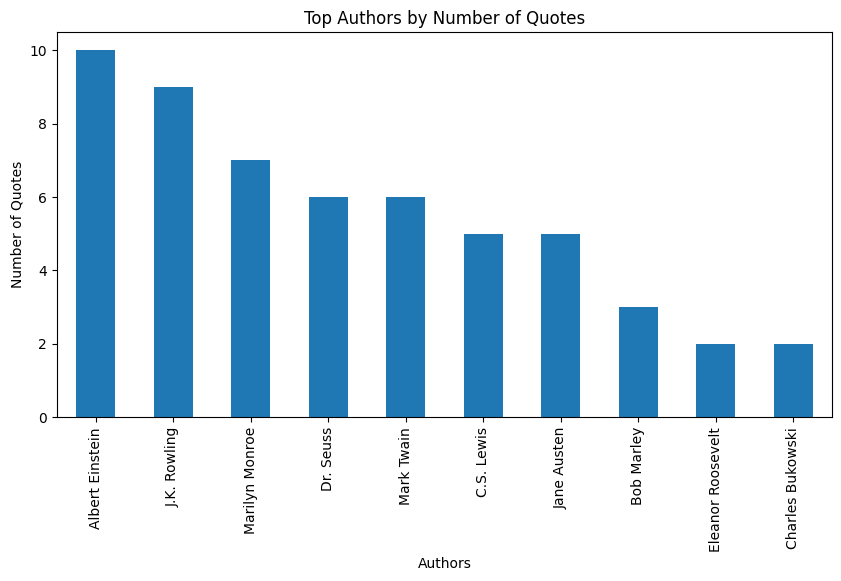

In [153]:
author_counts.head(10).plot(kind='bar', figsize=(10, 5))
plt.title("Top Authors by Number of Quotes")
plt.xlabel("Authors")
plt.ylabel("Number of Quotes")
plt.show()


#### Viz - Words

In [154]:
from wordcloud import WordCloud

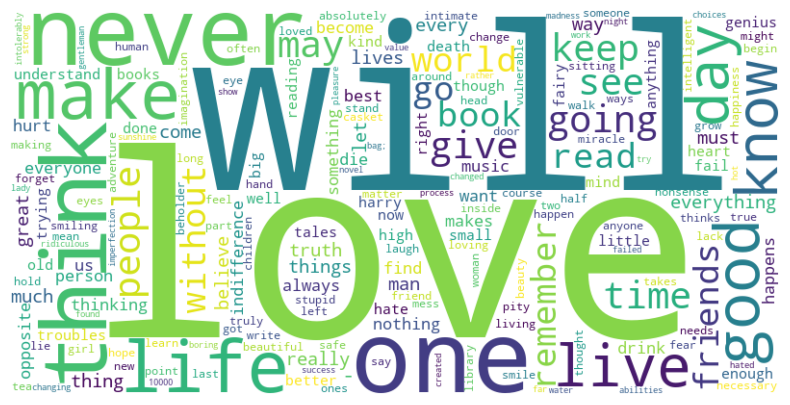

In [155]:
# Wordcloud of Frequent Words
wordcloud_words = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_words, interpolation='bilinear')
plt.axis("off")
plt.show()


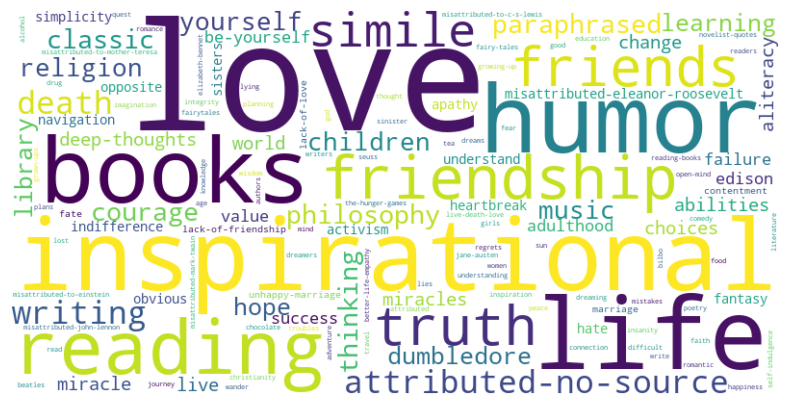

In [156]:
# Wordcloud of Frequent Tags
wordcloud_tags = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_tags, interpolation='bilinear')
plt.axis("off")
plt.show()